# Understand Your Data With Visualization

## Read file using pandas

In [192]:
import pandas as pd
import numpy as np

filename = 'data/05/data.csv'
data_cancer = pd.read_csv(filename)

## Extract data from dataFrame

In [193]:
data_extracted = data_cancer.iloc[:, 1:8]
data_extracted

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280
...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700


## 1 Univariate Plots

### 1.1 Histograms

- When exploring a dataset, you'll often want to get a quick understanding of the distribution of certain numerical variables within it. A common way of visualizing the distribution of a single numerical variable is by using a [Histogram](https://en.wikipedia.org/wiki/Histogram).

- A histogram divides the values within a numerical variable into “bins”, and counts the number of observations that fall into each bin. By visualizing these binned counts in a columnar fashion, we can obtain a very immediate and intuitive sense of the distribution of values within a variable.

- Advanced example : https://mode.com/example-gallery/python_histogram/

In [181]:
# Univariate Histograms
#histogram = data_cancer.hist(figsize=(15,15), bins=25)
histogram = data_extracted.hist(figsize=(15,15), bins=25)

### 1.2 Density Plots

- A density plot is a smoothed, continuous version of a histogram estimated from the data. 
- The most common form of estimation is known as kernel density estimation. 
- In this method, a continuous curve (the kernel) is drawn at every individual data point and all of these curves are then added together to make a single smooth density estimation.

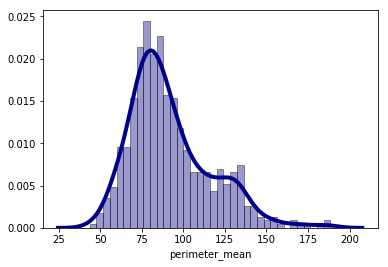

In [184]:
import seaborn as sns

perimeter_mean = sns.distplot(data_extracted["perimeter_mean"], hist=True, kde=True, 
                 bins=int(180/5), color = 'darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})

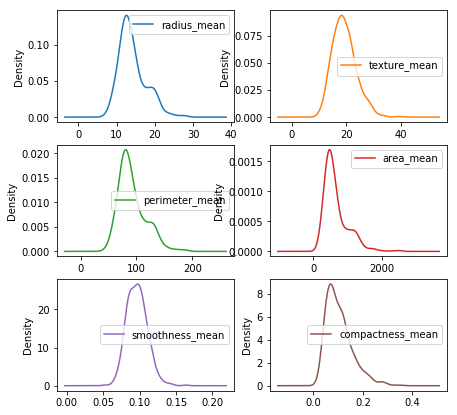

In [185]:
Density = data_extracted.plot(kind='density', subplots=True, layout=(3,2), sharex=False, figsize=(7,7))
#data_extracted["area_mean"].plot(kind='density')

### 1.3 Box and Whisker Plots

Another useful way to review the distribution of each attribute is to use Box and Whisker Plots
or boxplots for short.

- Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). 

- The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data)

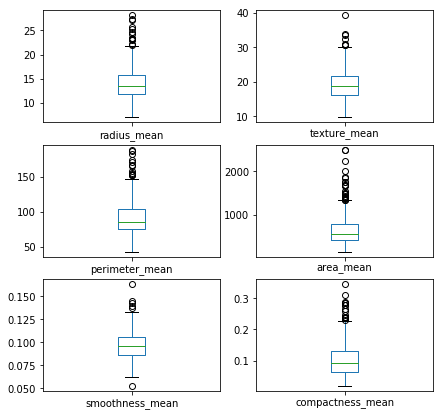

In [190]:
Box = data_extracted.plot(kind='box', subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(7,7) )

#Box = data_extracted.boxplot(figsize = (15,15))

## 2 Multivariate Plots

### 2.1 Correlation Matrix Plot

- Correlation gives an indication of how related the changes are between two variables. 
- If two variables change in the same direction they are positively correlated.
- If they change in opposite directions together (one goes up, one goes down), then they are negatively correlated.

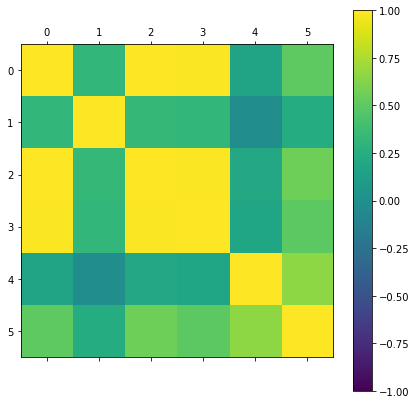

In [191]:
# Correction Matrix Plot

correlations = data_extracted.corr()

# plot correlation matrix
fig = pyplot.figure(figsize=(7,7))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
pyplot.show()

### 2.2 Scatter Plot Matrix

A scatter plot shows the relationship between two variables as dots in two dimensions, one
axis for each attribute. 

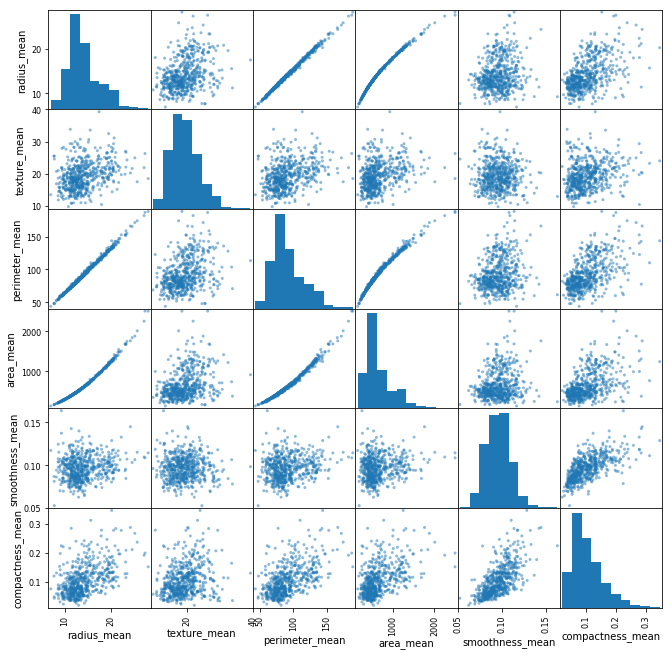

In [134]:
from pandas.plotting import scatter_matrix

scatter_matrix(data_extracted, figsize=(11,11))
pyplot.show()